### MAI THỊ THẢO LY - 20280064

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Import Libarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
PATH = "heart.csv"
df = pd.read_csv(PATH)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [3]:
# feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [4]:
print("Quantitative columns \n")
df.describe()

Quantitative columns 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

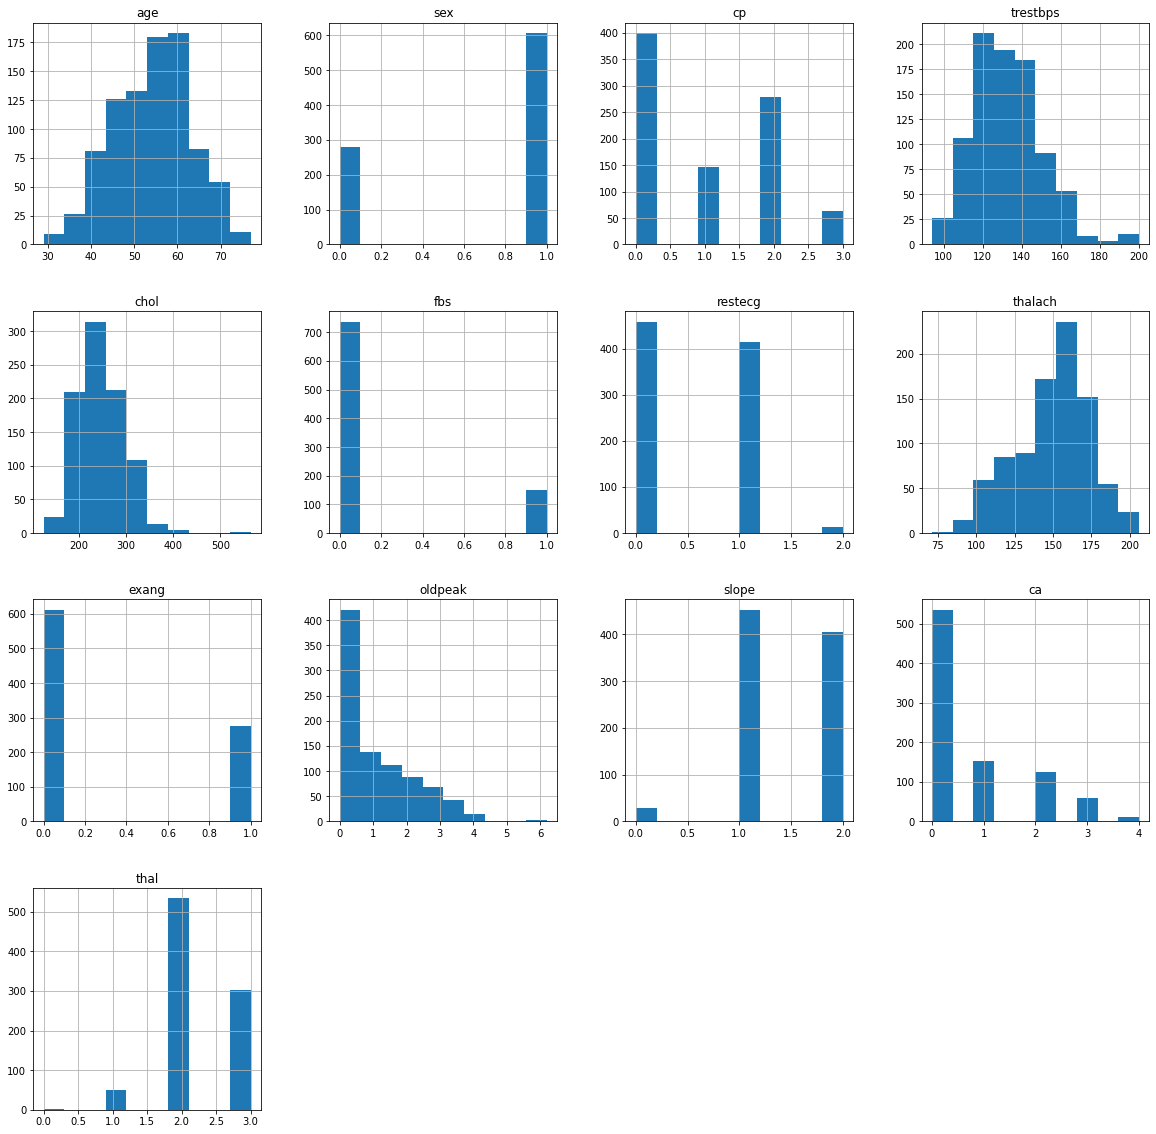

In [5]:
# histogram of features
df.iloc[:,:-1].hist(figsize=(20,20))

<AxesSubplot:>

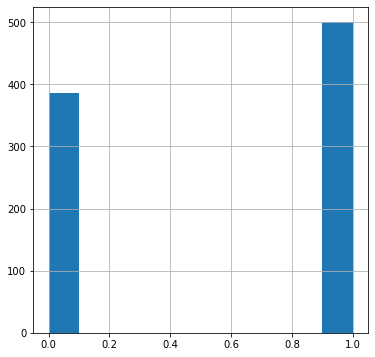

In [6]:
# histogram of target
df.iloc[:,-1].hist(figsize=(6,6))

<AxesSubplot:xlabel='count', ylabel='sex'>

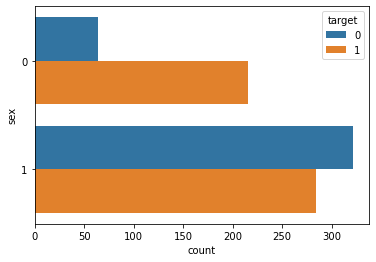

In [7]:
sns.countplot(y="sex", data=df, hue="target")

## Data Analysis

In [8]:
print("Continous Columns")
continous_columns = df.loc[:,['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe().columns
print(continous_columns)
print("Categorical Columns")
categorical_columns = df.loc[:,['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].describe().columns
print(categorical_columns)

Continous Columns
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')
Categorical Columns
Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')


<AxesSubplot:xlabel='age', ylabel='Count'>

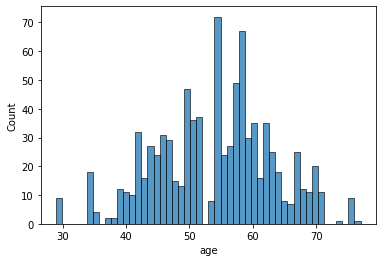

In [9]:
sns.histplot(x="age", data=df, bins=50)

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

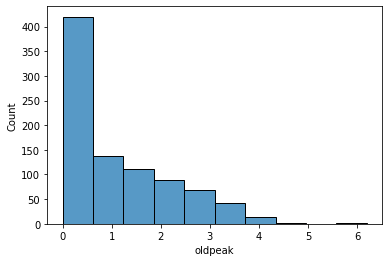

In [10]:
sns.histplot(x="oldpeak", data=df, bins=10)

<AxesSubplot:xlabel='count', ylabel='sex'>

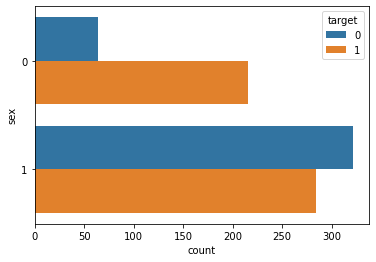

In [11]:
sns.countplot(y="sex", data=df, hue="target")

<AxesSubplot:xlabel='count', ylabel='cp'>

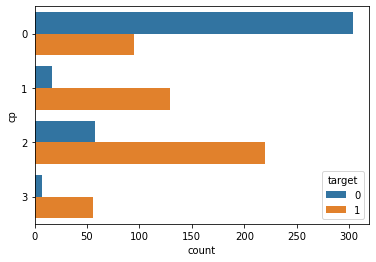

In [12]:
sns.countplot(y="cp", data=df, hue="target")

<AxesSubplot:xlabel='count', ylabel='fbs'>

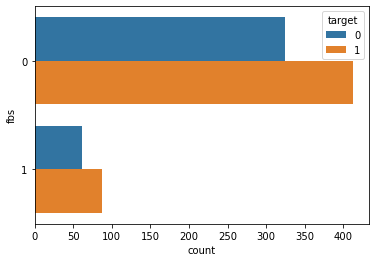

In [13]:
sns.countplot(y="fbs", data=df, hue="target")

<AxesSubplot:xlabel='count', ylabel='restecg'>

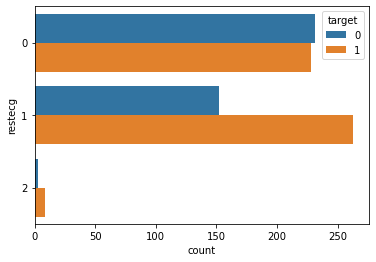

In [14]:
sns.countplot(y="restecg", data=df, hue="target")

<AxesSubplot:xlabel='count', ylabel='exang'>

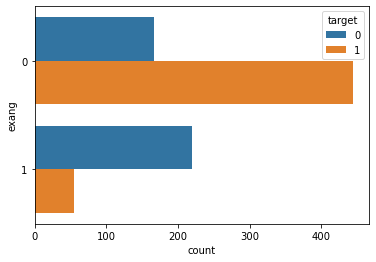

In [15]:
sns.countplot(y="exang", data=df, hue="target")

<AxesSubplot:xlabel='count', ylabel='slope'>

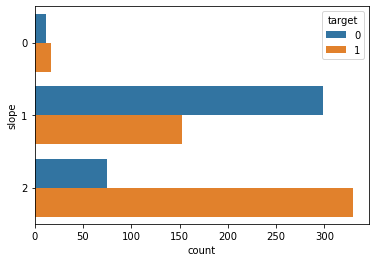

In [16]:
sns.countplot(y="slope", data=df, hue="target")

<AxesSubplot:xlabel='count', ylabel='ca'>

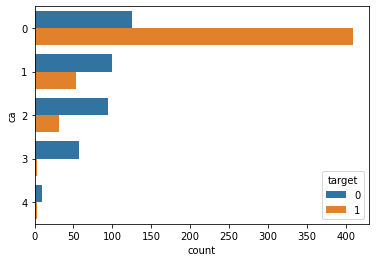

In [17]:
sns.countplot(y="ca", data=df, hue="target")

<AxesSubplot:xlabel='count', ylabel='thal'>

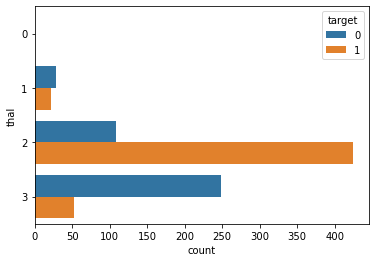

In [18]:
sns.countplot(y="thal", data=df, hue="target")

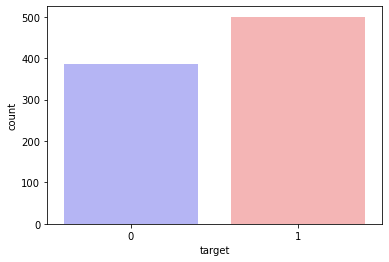

In [19]:
sns.countplot(x="target", data=df, palette="bwr") 
plt.show()

### check outlier for Continous Columns: 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'

<AxesSubplot:>

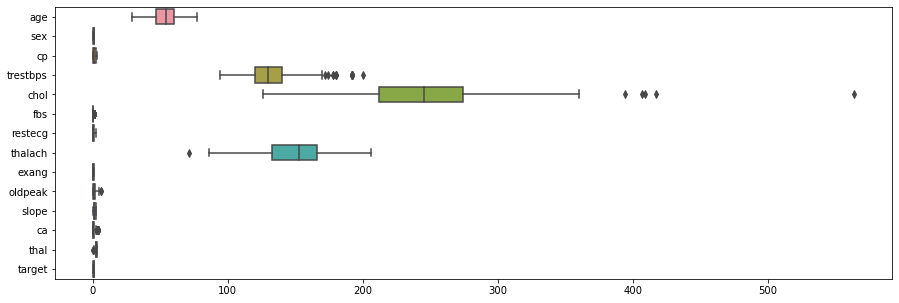

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')

<AxesSubplot:>

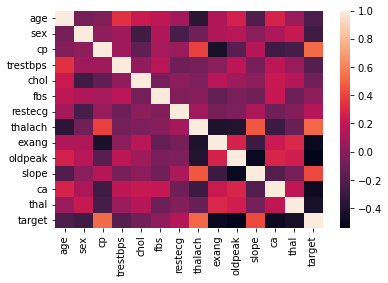

In [21]:
sns.heatmap(df.corr())

## Preprocessing

In [22]:
def preprocessing_data(df):
    outliers_features = ['trestbps','chol','thalach']
    for i in outliers_features:
        Inter_Quartile_Range = df[i].quantile(0.75) - df[i].quantile(0.25)
        
        lower_boundary = df[i].quantile(0.25) - (Inter_Quartile_Range * 1.5)
        upper_boundary = df[i].quantile(0.75) + (Inter_Quartile_Range * 1.5)
        df[i]= np.where(df[i] > upper_boundary, upper_boundary,np.where(df[i] < lower_boundary, lower_boundary,df[i]))
    return df

In [23]:
df = preprocessing_data(df.copy())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120.0,249.0,0,0,144.0,0,0.8,2,0,3,0
1,71,0,1,160.0,302.0,0,1,162.0,0,0.4,2,2,2,1
2,71,0,1,160.0,303.0,0,1,163.0,0,0.4,2,2,2,1
3,71,0,1,160.0,304.0,0,1,164.0,0,0.4,2,2,2,1
4,71,0,1,160.0,305.0,0,1,165.0,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120.0,211.0,0,0,115.0,0,1.5,1,0,2,1
882,44,0,2,108.0,141.0,0,1,175.0,0,0.6,1,0,2,1
883,52,1,0,128.0,255.0,0,1,161.0,1,0.0,2,1,3,0
884,59,1,3,160.0,273.0,0,0,125.0,0,0.0,2,0,2,0


<AxesSubplot:>

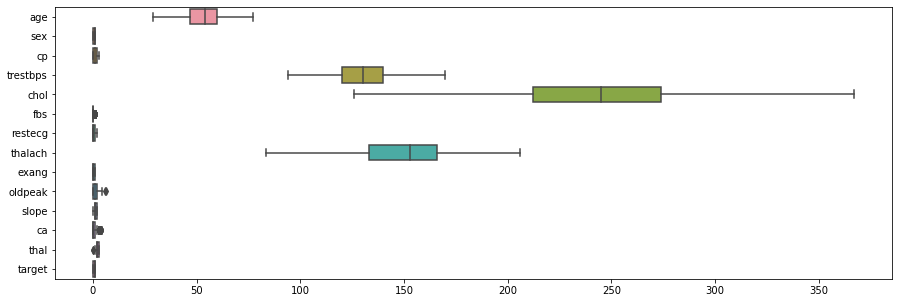

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')

## Feature Engineering

In [25]:
# Heatmap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
def apply_feature_engineering(X_train,X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled,X_test_scaled

In [26]:
def prepare_X_y(df):
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [58]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1100
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [59]:
X_train_scaled, X_test_scaled = apply_feature_engineering(trainX, testX)

## Build SK-learn model

In [79]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.7))
    model.fit(X,y)
    # Todo: fit your model with X, y

    return model

def calculate_performance(y_test, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test , y_pred))
    print("Recall: ", recall_score(y_test , y_pred ))
    print("F1: ", f1_score(y_test , y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_test , y_pred ))
    print("classification_report: \n", classification_report(y_test, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score =f1_score(y_test , y_pred)
    return main_score

model = build_model(trainX, trainY)
print('model before scaled:', model.score(testX, testY))
model = build_model(X_train_scaled, trainY)
print('model after scaled:',model.score(X_test_scaled, testY))

model before scaled: 0.7640449438202247
model after scaled: 0.949438202247191


C:\Users\maith\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [80]:
# Compare on training dataset
y_pred = model.predict(X_test_scaled)
y_pred = pd.DataFrame({'target': y_pred})
y_pred

,target
0,1
1,1
2,1
3,1
4,0
...,...
173,1
174,0
175,0
176,1


In [81]:
calculate_performance(testY, y_pred)

Accuracy:  0.949438202247191
Precision:  0.9603960396039604
Recall:  0.9509803921568627
F1:  0.9556650246305418
Confusion matrix: 
 [[72  4]
 [ 5 97]]
classification_report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94        76
           1       0.96      0.95      0.96       102

    accuracy                           0.95       178
   macro avg       0.95      0.95      0.95       178
weighted avg       0.95      0.95      0.95       178



0.9556650246305418

In [107]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. Chọn F1-score. Vì khi ta so sánh giữa việc Khỏe mạnh bị dự đoán là bị bệnh "\
    "và bị bệnh được dự đoán là khỏe mạnh thì hai cái đều quan trọng như nhau nên ta không thể ưu tiên chọn 1 trong 2. "\
    "Vậy nên muốn cả 2 cái đều tốt ta chọn F1-score. "\
           "Khi thay   đổi solver và penalty ta thấy data chưa scale khi dự đoán rất thấpthay đổi rất lớn, còn data scaled thì không thay đổi nhiều. Nên  em đã chọn penalty='elasticnet', solver='saga',l1_ratio=0.7 để thấy được sự khác biệt này."

In [108]:
get_conclusion()

"7. Chọn F1-score. Vì khi ta so sánh giữa việc Khỏe mạnh bị dự đoán là bị bệnh và bị bệnh được dự đoán là khỏe mạnh thì hai cái đều quan trọng như nhau nên ta không thể ưu tiên chọn 1 trong 2. Vậy nên muốn cả 2 cái đều tốt ta chọn F1-score. Khi thay   đổi solver và penalty ta thấy data chưa scale khi dự đoán rất thấpthay đổi rất lớn, còn data scaled thì không thay đổi nhiều. Nên  em đã chọn penalty='elasticnet', solver='saga',l1_ratio=0.7 để thấy được sự khác biệt này."